In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from vega_datasets import data
import plotly.graph_objects as go
import plotly.io as pio

plt.style.use('seaborn-whitegrid')

In [50]:
dcity.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons
0,1743-11-01,6.068000,1.73700,Århus,Denmark,57.05N,10.33E,Nov,1743,Northern Hemisphere,Autumn
1,1743-12-01,7.695135,1.66872,Århus,Denmark,57.05N,10.33E,Dec,1743,Northern Hemisphere,Winter


#### Notes about the Data
* Number of records 
* Average temperature column Min Value and Max value 
* AverageTemperatureUncertainty
* Number of Countries, do : {len(data['Country'].unique())}
* Number of Cities in both city and major city datasets
* Year Range 



### Observations

In [51]:
observations = {}

In [52]:
y_countrymed = pd.DataFrame(dcity.groupby(['Country','Year'])['AverageTemperature'].median())
observations['y_countrymed'] = 'YearWise Country Median-Temperature'
y_countrymed

AverageTemperature
Country     Year                    
Afghanistan 1833           13.576000
            1834           13.462000
            1835           14.342919
            1836           14.342919
            1837           14.342919
...                              ...
Zimbabwe    2009           21.078000
            2010           21.943000
            2011           21.511000
            2012           21.488500
            2013           19.625000

[32881 rows x 1 columns]

In [53]:
m_countrymed = pd.DataFrame(dcity.groupby(['Country','Month'])['AverageTemperature'].median())
observations['m_countrymed'] = 'Monthly Country Median-Temperature'
m_countrymed

AverageTemperature
Country     Month                    
Afghanistan Apr               13.7970
            Aug               24.2690
            Dec                2.7920
            Feb                3.1310
            Jan                1.0580
...                               ...
Zimbabwe    Mar               21.2410
            May               17.4940
            Nov               22.7500
            Oct               22.6500
            Sept              20.5225

[1908 rows x 1 columns]

In [54]:
# Countries & Major Cities
majorlocs = {}
for country in dmajcity['Country'].unique():
    majorlocs[country] = list(dmajcity[dmajcity['Country']==country]['City'].unique())
    
majorlocs

{"Côte D'Ivoire": ['Abidjan'],
 'Ethiopia': ['Addis Abeba'],
 'Syria': ['Aleppo'],
 'Egypt': ['Alexandria', 'Cairo', 'Gizeh'],
 'Turkey': ['Ankara', 'Istanbul', 'Izmir'],
 'Iraq': ['Baghdad'],
 'Germany': ['Berlin'],
 'Morocco': ['Casablanca'],
 'United States': ['Chicago', 'Los Angeles', 'New York'],
 'Vietnam': ['Ho Chi Minh City'],
 'Saudi Arabia': ['Jiddah', 'Riyadh'],
 'Afghanistan': ['Kabul'],
 'Ukraine': ['Kiev'],
 'Congo (Democratic Republic Of The)': ['Kinshasa'],
 'United Kingdom': ['London'],
 'Spain': ['Madrid'],
 'Iran': ['Mashhad'],
 'Canada': ['Montreal', 'Toronto'],
 'Russia': ['Moscow', 'Saint Petersburg'],
 'France': ['Paris'],
 'Italy': ['Rome'],
 'Dominican Republic': ['Santo Domingo'],
 'Sudan': ['Umm Durman'],
 'Brazil': ['Belo Horizonte',
  'Brasília',
  'Fortaleza',
  'Rio De Janeiro',
  'São Paulo',
  'Salvador'],
 'Colombia': ['Bogotá', 'Cali'],
 'Indonesia': ['Jakarta', 'Surabaya'],
 'Somalia': ['Mogadishu'],
 'Kenya': ['Nairobi'],
 'South Africa': ['Cape Tow

### Seasons

In [55]:
# def season(month):
#     day = 1

#     if month in ('Jan', 'Feb', 'Mar'):
#         season = 'Winter'
#     elif month in ('Apr', 'May', 'Jun'):
#         season = 'Spring'
#     elif month in ('Jul', 'Aug', 'Sept'):
#         season = 'Summer'
#     else:
#         season = 'Autumn'

#     if (month == 'Mar') and (day > 19):
#         season = 'Spring'
#     elif (month == 'Jun') and (day > 20):
#         season = 'Summer'
#     elif (month == 'Sept') and (day > 21):
#         season = 'Autumn'
#     elif (month == 'Dec') and (day > 20):
#         season = 'Winter'

#     return season

In [56]:
# india = dcity[dcity['Country']=='India']

In [57]:
# india['dt'] = pd.to_datetime(india['dt'])

In [58]:
# india['Season'] = india['Month'].apply(season)
# india

### Pipelines for Plots & transformations

In [59]:
def median_agg(data, sequence='Month',loc='Country',countryname=None):
      
    '''
    Median Aggregation of AverageTemperatures by Country
    '''
    
    if loc == 'Country':    
        df = pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
        if countryname !=None:
            try:
                return df.loc[countryname, :]
            except:
                print('Invalid Country Name')
        else:
            return pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
    elif loc == 'City':
        if countryname != None:
            df = pd.DataFrame(data.groupby(['Country',loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
            try:
                return df.loc[countryname, :]
            except:
                print('Invalid Country Name')

        else:
            return pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
            
    else:
        return None
    


### Monthly Average Temperature

In [60]:
def order_monthidx(df):
    cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']
    df.index = pd.CategoricalIndex(df.index, categories=cats, ordered=True)
    df = df.sort_index()
    return df

In [61]:
# def plotting(data,cityname,attr,mode='Monthwise',type2=None):
#     plt.figure(figsize=(15,8))
#     x = data.index
#     y = data[attr].values
#     plots = sns.barplot(x=x,y=y,palette='Blues_r',label=cityname)

#     for bar in plots.patches:
#         '''Snippet lifted from geeksforgeeks'''
#         plots.annotate(format(bar.get_height(), '.2f'),
#                        (bar.get_x() + bar.get_width() / 2,
#                         bar.get_height()), ha='center', va='center',
#                        size=12, xytext=(0, 8),
#                        textcoords='offset points')
#     '''Snippet lifted from geeksforgeeks'''
#     plt.title('Monthly Average Temperatures Recorded in {}'.format(cityname),size=15)
#     plt.ylabel('Temperatures °C',size=12)
#     plt.xlabel('Months',size=12)
#     plt.legend(bbox_to_anchor=(1.13, 1.05))
#     plt.show()
    

In [62]:

test = ['crimson','darkorange','magenta','darkslateblue']
for x in range(3):
    print(test.pop(0))



crimson
darkorange
magenta


In [63]:
def plottimeseries(data,cityname, attr='AverageTemperature',loc='City',multiple=None):
    
    ## Prompt 
    if attr == 'AverageTemperature':
        prompt = 'Average Temperature'
    else:
        prompt = 'Average Temperature Uncertainty (Δ T)'
    
    if loc=='City':

        if 'Month' in data.reset_index().columns:
            plt.figure(figsize=(15,8))
            
            if multiple == None:
                data = data.xs(cityname, level=0, drop_level=True)
                data = order_monthidx(data)
                x = data.index
                y = data[attr].values
                if attr == 'AverageTemperature':
                    plots = sns.barplot(x=x,y=y,palette='Blues_r',label=cityname,edgecolor='black')

                    for bar in plots.patches:
                        
                        plots.annotate(format(bar.get_height(), '.2f'),
                                    (bar.get_x() + bar.get_width() / 2,
                                        bar.get_height()), ha='center', va='center',
                                    size=18, xytext=(0, 8),
                                    textcoords='offset points')
                    
                    plt.title('Monthly {} Recorded in {}'.format(prompt,cityname),size=25)
                    plt.ylabel('Temperatures °C',size=23)
                    plt.xlabel('Months',size=23)
                    plt.xticks(size=15)
                    plt.yticks(size=15)
                else:
                    sns.lineplot(x=x,y=y,color='royalblue',marker='o')
                    plt.title('Monthly {} Recorded in {}'.format(prompt,cityname),size=25)
                    plt.ylabel('Temperatures °C',size=23)
                    plt.xlabel('Months',size=23)
                    plt.xticks(size=15)
                    plt.yticks(size=15)
                # plt.legend(bbox_to_anchor=(1.13, 1.05))
                
            
            else:
                coords = []
                if len(multiple) <=3 and len(multiple) <=5:
                    for cityname in multiple:
                        df = data.xs(cityname, level=0, drop_level=True)
                        df = order_monthidx(df)
                        x = df.index
                        y = df[attr].values
                        coords.append((x,y))
                

                # setting plot attributes
                plotattrs = {}
                colors = ['crimson','magenta','darkorange','darkslateblue']
                for cityname in multiple[1:]:
                    plotattrs[cityname] = {'marker':'o', 'color':colors.pop(0)}
                
                count = 0
                for coord,cityname in zip(coords,multiple):
                    x,y = coord

                    if count < 1:
                        sns.barplot(x=x,y=y,palette='Blues_r',label=cityname, edgecolor='black')
                        count +=1
                    else:
                        pltattrs = plotattrs[cityname]
                        sns.lineplot(x=x,y=y,color=pltattrs['color'],marker=pltattrs['marker'],label=cityname)
                    plt.title('Monthly {} Recorded in {}'.format(prompt,cityname),size=25)
                    plt.ylabel('Temperatures °C',size=23)
                    plt.xlabel('Months',size=23)
                    plt.xticks(size=15)
                    plt.yticks(size=15)
                    plt.legend(bbox_to_anchor=(1.13, 1.05))
                    
                
            
        else:
            data = data.xs(cityname, level=0, drop_level=True)
            plt.figure(figsize=(15,8))
            x = data.index
            y = data[attr].values
            sns.lineplot(x=x,y=y,label=cityname,marker='P',color='royalblue',palette='inferno')
            plt.title('Yearly {} Recorded in {}'.format(prompt,cityname),size=25)
            plt.ylabel('Temperatures °C',size=23)
            plt.xlabel('Years',size=23)
            plt.xticks(size=15)
            plt.yticks(size=15)
            plt.legend(bbox_to_anchor=(1.13, 1.05))
            

    else:
        pass

In [64]:
# example
monthex = median_agg(dcity,sequence='Month',loc='City',countryname='Canada')
pd.Series(dict(monthex.index)).index

Index(['Abbotsford', 'Barrie', 'Calgary', 'Edmonton', 'Guelph', 'Halifax',
       'Hamilton', 'Kelowna', 'Kingston', 'Kitchener', 'London', 'Montreal',
       'Oshawa', 'Ottawa', 'Quebec', 'Regina', 'Saskatoon', 'Sherbrooke',
       'Sudbury', 'Toronto', 'Trois Rivières', 'Vancouver', 'Victoria',
       'Waterloo', 'Winnipeg'],
      dtype='object')

In [65]:
cities = ['Ottawa','Sydney','Tokyo']

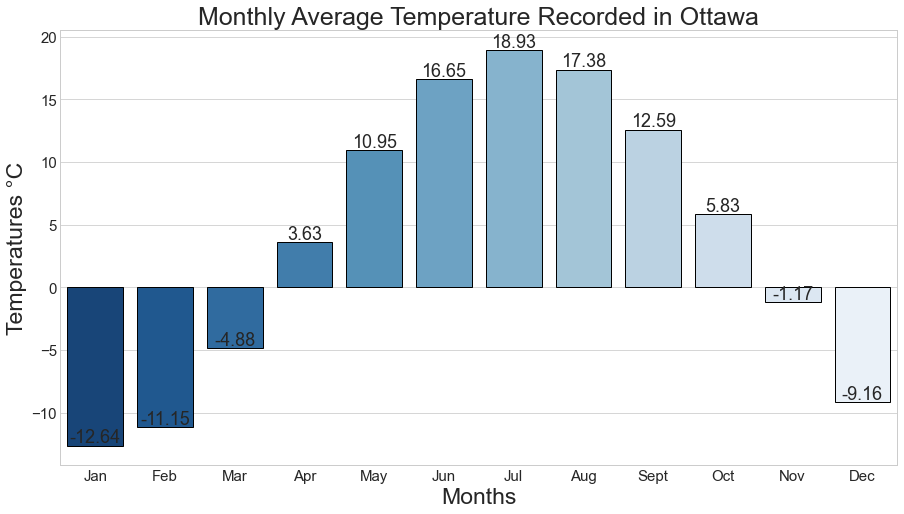

In [66]:
# mutiple
plottimeseries(monthex,cityname='Ottawa',multiple=None)

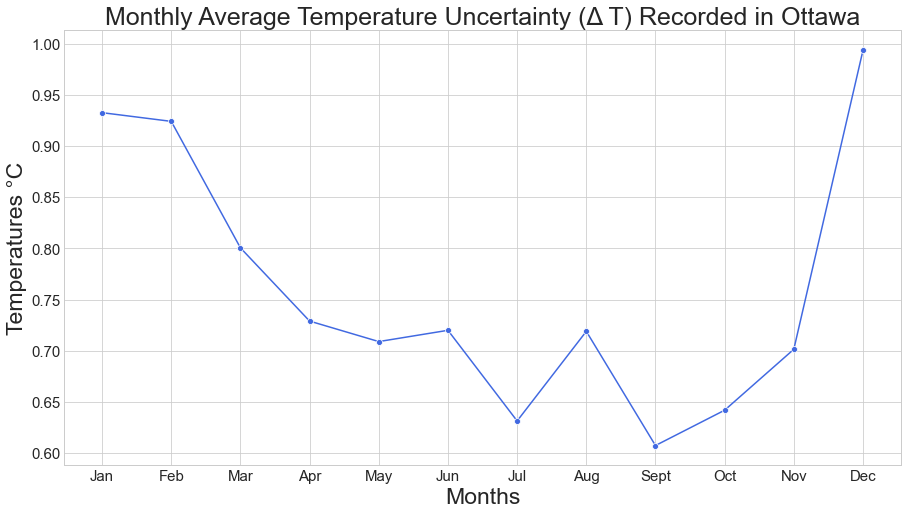

In [67]:
# mutiple
plottimeseries(monthex,cityname='Ottawa',attr='AverageTemperatureUncertainty',multiple=None)

In [68]:
# example
yearex = median_agg(dmajcity,sequence='Year',loc='City',countryname='India')

In [69]:
yearex

AverageTemperature  AverageTemperatureUncertainty
City      Year                                                   
Ahmadabad 1796           27.619000                         2.3565
          1797           27.387500                         2.1105
          1798           26.780426                         2.0195
          1799           27.878500                         2.0875
          1800           27.126000                         2.0365
...                            ...                            ...
Surat     2009           28.469500                         0.3130
          2010           28.030000                         0.3215
          2011           27.565000                         0.2560
          2012           27.708000                         0.4400
          2013           27.306000                         0.5400

[3052 rows x 2 columns]

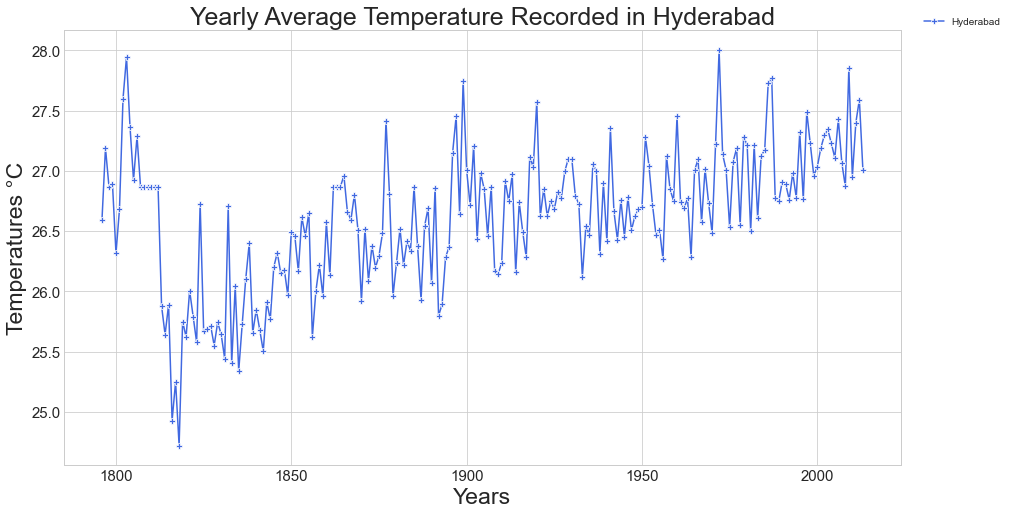

In [70]:
plottimeseries(yearex,cityname='Hyderabad')

In [71]:
indiamonthly = order_monthidx(median_agg(dcity,countryname='India'))
usmonthly = order_monthidx(median_agg(dcity,countryname='United States'))
canmonthly = order_monthidx(median_agg(dcity,countryname='Canada'))

In [72]:
indiamonthly

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,18.726,0.707
Feb,21.448,0.653
Mar,25.902,0.617
Apr,29.350,0.607
May,31.387,0.617
Jun,30.451,0.638
Jul,28.504,0.548
Aug,27.769,0.520
Sept,27.498,0.521


In [73]:
canmonthly

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,-8.765,0.866
Feb,-8.012,0.845
Mar,-2.931,0.713
Apr,4.235,0.637
May,10.713,0.616
Jun,15.904,0.591
Jul,18.552,0.583
Aug,17.513,0.588
Sept,13.025,0.526


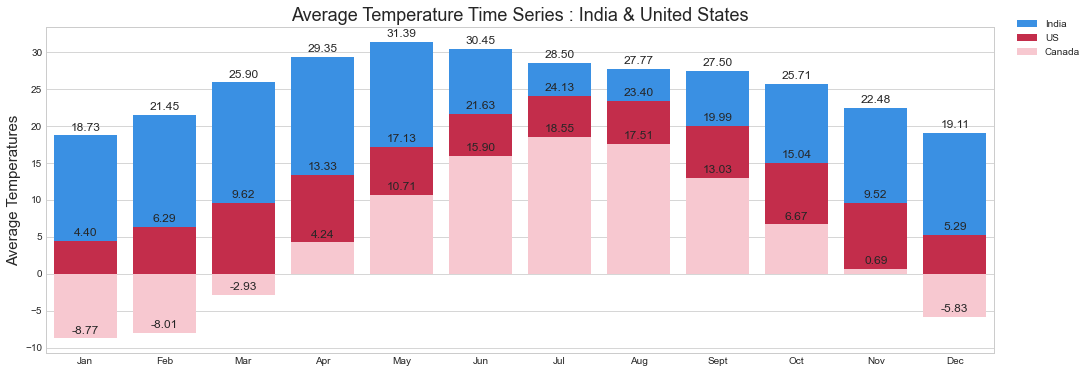

In [74]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x=list(indiamonthly.index),y=indiamonthly['AverageTemperature'],label='India',color='dodgerblue')
sns.barplot(x=list(indiamonthly.index),y=usmonthly['AverageTemperature'],label='US',color='crimson')
sns.barplot(x=list(indiamonthly.index),y=canmonthly['AverageTemperature'],label='Canada',color='pink')
for bar in plots.patches:
    '''Snippet lifted from geeksforgeeks'''
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Temperature Time Series : India & United States',size=18)
plt.ylabel('Average Temperatures',size=15)
plt.legend(bbox_to_anchor=(1.1, 1.05))

### Interactive

In [75]:
monthex = median_agg(dcity,sequence='Month',loc='City',countryname='Canada')
pd.Series(dict(monthex.index)).index

Index(['Abbotsford', 'Barrie', 'Calgary', 'Edmonton', 'Guelph', 'Halifax',
       'Hamilton', 'Kelowna', 'Kingston', 'Kitchener', 'London', 'Montreal',
       'Oshawa', 'Ottawa', 'Quebec', 'Regina', 'Saskatoon', 'Sherbrooke',
       'Sudbury', 'Toronto', 'Trois Rivières', 'Vancouver', 'Victoria',
       'Waterloo', 'Winnipeg'],
      dtype='object')

In [76]:
torontom = order_monthidx(monthex.loc['Toronto',:])

In [77]:
torontom

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,-7.9840,0.8590
Feb,-7.5875,0.8260
Mar,-3.0095,0.7065
Apr,4.5010,0.7310
May,11.3315,0.6960
Jun,17.0195,0.6785
Jul,19.2300,0.6050
Aug,18.3325,0.6195
Sept,14.2305,0.5135


In [78]:
yearex = median_agg(dcity,sequence='Year',loc='City',countryname='Canada')

In [79]:
toronty = yearex.loc['Toronto',:]

In [80]:
toronty

,AverageTemperature,AverageTemperatureUncertainty
Year,,
1743,2.833956,1.591154
1744,5.832956,1.710000
1745,5.773911,1.277309
1746,5.773911,1.277309
1747,5.773911,1.277309
...,...,...
2009,6.559000,0.249000
2010,8.948000,0.226500
2011,7.316500,0.257000


In [81]:
def plotlychart(df,attr='AverageTemperature',cityname=None,sequence='Monthly'):
    

    # pio.templates.default = 'plotly_white'
        ## Prompt 
    if attr == 'AverageTemperature':
        prompt = 'Average Temperature'
    else:
        prompt = 'Average Temperature Uncertainty (Δ T)'
    
    # Template
    pio.templates.default = 'plotly_white'
    

    if sequence == 'Monthly':

        x = list(df.index)
        y0 = np.round(df[attr].values,3)

        fig = go.Figure()
        fig.add_trace(go.Bar(x=x, y=y0, text=y0, textposition='outside',
                             marker={'color': y0, 'colorscale': 'Blues'},name='Average'))
        # fig.add_trace(go.Bar(x=x, y=y1,
        #                 marker_color='crimson',name='deltaT'))


        fig.update_layout(font=dict(size=11,family='sora'),template='plotly_white' ,title='Monthly {} Recorded in {}'.format(prompt,cityname), 
                          xaxis_title='Months',
                          yaxis_title='Temperature C',
                          title_x=0.5
                         )

        

    elif sequence == 'Yearly':
        x = list(df.index)
        y0 = df[attr]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y0,name='Average',mode='lines',
                                line=dict(color='dodgerblue',width=2)))
        # fig.add_trace(go.Bar(x=x, y=y1,
        #                 marker_color='crimson',name='deltaT'))


        fig.update_layout(font=dict(size=11,family='sora'), template='plotly_white', title='Monthly {} Recorded in {}'.format(prompt,cityname), 
                          xaxis_title='Months',
                          yaxis_title='Temperature C',
                          title_x=0.5
                         )


    return fig

### Montly Sequence

In [82]:
plotlychart(torontom,cityname='Toronto',sequence='Monthly')

In [83]:
plotlychart(torontom,cityname='Toronto',attr='AverageTemperatureUncertainty',sequence='Monthly')

In [84]:
plotlychart(toronty,cityname='Toronto',sequence='Yearly')

In [85]:
plotlychart(toronty,cityname='Toronto',sequence='Yearly',attr='AverageTemperatureUncertainty')

### For a selected year print Average Monthly Temperature TimeSeries

In [86]:
def selective_scrutiny(df, year, country, city=None,quantify=False):
    years = df['Year'].unique()
    if year in years:
        ydf = df[dcity['Year']==year]
        cdf = ydf[ydf['Country']==country]
        cdf = cdf.groupby(['City','Month'])[['AverageTemperature','AverageTemperatureUncertainty']].median()
        
        if not city == None:
            try:
                return cdf.loc[city,:]
            except:
                print('Invalid City Name')
        else:
            return cdf
        
        if quantify:
            pass
            
        
        
    else:
        print("Data doesn't have records of temperatures from the years after 2013 and before 1743")

    

In [139]:
selective_scrutiny(dcity, 2013, 'India', 'Hyderabad')

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Apr,32.245000,0.615000
Aug,26.923000,0.413000
Feb,26.226000,0.599000
Jan,24.670000,0.769000
Jul,27.011000,0.478000
Jun,29.487000,0.754000
Mar,29.598000,0.613000
May,34.650000,0.823000
Sept,26.869335,0.956286


### Choropleth

In [88]:
# df.to_csv('choropleth-dat.csv')
chorodf = pd.read_csv('./choropleth-dat.csv').drop('Unnamed: 0',axis=1)

In [89]:
fig = go.Figure(data=go.Choropleth(
locations = chorodf['CODE'],
z = chorodf['AvgTemp'],
text = chorodf['COUNTRY'],
colorscale = 'Blues',
autocolorscale=False,
marker_line_color='black',
marker_line_width=0.9,
colorbar_ticksuffix = '°C',
colorbar_title = 'Temperature °C',
))

fig.update_layout( geo=dict( showframe=True, showcoastlines=True, projection_type='natural earth'),font=dict(size=15,family='sora'),template='plotly_white' ,height=600,width=900,dragmode=False)
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)

### Feature Engineering
---
* Hemispheres
* Seasons

#### Hemispheres

In [90]:
dcity['Country'].unique().__len__()
countries = dcity['Country'].unique()

In [91]:
# southern hemisphere countries
sh = pd.read_csv('../Data/traveller-dat/SHcountries.csv')
sh = sh['country'].values
sh

array(['Tanzania', 'South Africa', 'Argentina', 'Angola', 'Peru',
       'Mozambique', 'Madagascar', 'Australia', 'Malawi', 'Chile',
       'Zambia', 'Zimbabwe', 'Rwanda', 'Burundi', 'Bolivia',
       'Papua New Guinea', 'Paraguay', 'New Zealand', 'Uruguay',
       'Namibia', 'Botswana', 'Lesotho', 'Timor-Leste', 'Mauritius',
       'Eswatini', 'Fiji', 'Comoros', 'Solomon Islands', 'Vanuatu',
       'Samoa', 'Seychelles', 'Tuvalu', 'Nauru'], dtype=object)

In [92]:
# Checking if all countries exist
# for c in sh:
#     if c in countries:
#         pass
#     else:
#         print(c)

In [93]:
# equator
with open('../Data/traveller-dat/equator.txt','r') as f:
    eq = f.readlines()

In [94]:
eq = list(map(lambda x : x.strip(), eq))

In [95]:
# Checking if all countries exist
# for c in eq:
#     if c in countries:
#         pass
#     else:
#         print(c)

In [96]:
# print((list(sh) + list(eq)).__len__())
# print(set(list(sh) + list(eq)).__len__()) # check

In [97]:
# Dicts
equator = {}
southernhem = {}
for ec,sc in zip(eq,sh):
    equator[ec] = 'Equator'
    southernhem[sc] = 'Southern Hemisphere'

equator


{'São Tomé and Principe': 'Equator',
 'Gabon': 'Equator',
 'Congo': 'Equator',
 'Uganda': 'Equator',
 'Kenya': 'Equator',
 'Somalia': 'Equator',
 'Maldives': 'Equator',
 'Indonesia': 'Equator',
 'Kiribati': 'Equator',
 'Ecuador': 'Equator',
 'Colombia': 'Equator',
 'Brazil': 'Equator'}

In [98]:
# combine
equator.update(southernhem)
mapping = equator
mapping

{'São Tomé and Principe': 'Equator',
 'Gabon': 'Equator',
 'Congo': 'Equator',
 'Uganda': 'Equator',
 'Kenya': 'Equator',
 'Somalia': 'Equator',
 'Maldives': 'Equator',
 'Indonesia': 'Equator',
 'Kiribati': 'Equator',
 'Ecuador': 'Equator',
 'Colombia': 'Equator',
 'Brazil': 'Equator',
 'Tanzania': 'Southern Hemisphere',
 'South Africa': 'Southern Hemisphere',
 'Argentina': 'Southern Hemisphere',
 'Angola': 'Southern Hemisphere',
 'Peru': 'Southern Hemisphere',
 'Mozambique': 'Southern Hemisphere',
 'Madagascar': 'Southern Hemisphere',
 'Australia': 'Southern Hemisphere',
 'Malawi': 'Southern Hemisphere',
 'Chile': 'Southern Hemisphere',
 'Zambia': 'Southern Hemisphere',
 'Zimbabwe': 'Southern Hemisphere'}

In [99]:
mapping.get('India','Northern Hemisphere')

'Northern Hemisphere'

In [100]:
dcity = pd.read_csv('unis-country.csv').drop('Unnamed: 0',axis=1)

In [102]:
# unis_country

In [103]:
dcity['Hemisphere'] = dcity['Country'].apply(lambda x : mapping.get(x,'Northern Hemisphere'))

In [104]:
dcity[dcity['Hemisphere']=='Southern Hemisphere']['Country'].unique()

array(['Australia', 'South Africa', 'Chile', 'Peru', 'Argentina',
       'Tanzania'], dtype=object)

In [105]:
# dcity[dcity['Hemisphere']=='Northern Hemisphere']['Country'].unique()

In [106]:
# removed bhutan & north korea
with open('../Data/traveller-dat/monsoon.txt','r') as f:
    monsoon = f.readlines()

In [107]:
monsoon = list(map(lambda x:x.split('\t')[0],monsoon))

#### Seasons

In [ ]:
# for Nothern Hemisphere & Equator
def mapnh(month):
    if month in ('Dec','Jan', 'Feb', ):
        season = 'Winter'
    elif month in ('Mar', 'Apr', 'May', ):
        season = 'Spring'
    elif month in ('Jun', 'Jul', 'Aug',):
        season = 'Summer'
    else:
        season = 'Autumn'
    
    return season

In [ ]:
# for monsoon
def mapmon(month):
    if month in ('Nov','Dec','Jan', 'Feb', ):
        season = 'Winter'
    elif month in ('Mar', 'Apr', ):
        season = 'Spring'
    elif month in ('May','Jun',):
        season = 'Summer'
    elif month in ('Jul','Aug'):
        season = 'Monsoon'
    else:
        season = 'Autumn'
    return season

In [ ]:
# southern hemisphere
def mapsh(month):
    if month in ('Dec','Jan', 'Feb', ):
        season = 'Summer'
    elif month in ('Mar', 'Apr', 'May', ):
        season = 'Autumn'
    elif month in ('Jun', 'Jul', 'Aug',):
        season = 'Winter'
    else:
        season = 'Spring'
    return season

In [ ]:
# # Check
# for mcountry in monsoon:
#     if mcountry in countries:
#         pass
#     else:
#         print(mcountry)
# # after removing bhutan and north korea

#### Three splits, Northern, Southern, equator 
* Countries at equator and northern hemisphere share the same seasonal mapping 
* monsoon countries will be mapped next
* then southern hemisphere

In [ ]:
# check if monsoon countries overlap with equator's

print('before-duplicates',(eq + monsoon).__len__())
print('after-duplicates',set(eq + monsoon).__len__())


In [ ]:
set.intersection(set(eq),set(monsoon))

In [ ]:
monsoon.remove('Indonesia')

In [ ]:
# categories = ['Northern Hemisphere','Equator','Southern Hemisphere']
# dfs = []
# for category in categories:
#     dfs.append(dcity[dcity['Hemisphere'] == category])
    

In [ ]:
# dfs[0]['Seasons'] = dfs[0]['Month'].apply(mapnh)

In [ ]:
# dfs[1]['Seasons'] = dfs[1]['Month'].apply(mapnh)

In [ ]:
# dfs[2]['Seasons'] = dfs[2]['Month'].apply(mapsh)

In [ ]:
# dcity = pd.concat(dfs)

In [ ]:
# # Monsoon
# monsoon_df = dcity.loc[dcity['Country'].isin(monsoon)]
# dcity = dcity.loc[~dcity['Country'].isin(monsoon)]

In [ ]:
# # map monsoon
# monsoon_df['Seasons'] = monsoon_df['Month'].apply(mapmon)

In [ ]:
# Concat all the monsoon_df and dcity

In [ ]:
# dcity = pd.concat([dcity,monsoon_df])
# dcity

In [ ]:
# pipeline -- for seasonal feature engineering
def mapseasons(dcity):
    countries = dcity['Country'].unique()
    dcity['Hemisphere'] = dcity['Country'].apply(lambda x : mapping.get(x,'Northern Hemisphere'))
    categories = ['Northern Hemisphere','Equator','Southern Hemisphere']
    dfs = []
    for category in categories:
        dfs.append(dcity[dcity['Hemisphere'] == category])
    
    dfs[0]['Seasons'] = dfs[0]['Month'].apply(mapnh) # NH
    dfs[1]['Seasons'] = dfs[1]['Month'].apply(mapnh) # EQ
    dfs[2]['Seasons'] = dfs[2]['Month'].apply(mapsh) # SH
    
    dcity = pd.concat(dfs)
    
    # Monsoon
    monsoon_df = dcity.loc[dcity['Country'].isin(monsoon)]
    dcity = dcity.loc[~dcity['Country'].isin(monsoon)]
    
    monsoon_df['Seasons'] = monsoon_df['Month'].apply(mapmon)
    
    dcity = pd.concat([dcity,monsoon_df])
    
    return dcity
    


In [ ]:
# Applying the same feature engg to Dmajcity
dmajcity = mapseasons(dmajcity)

In [ ]:
dcity = mapseasons(dcity)

In [ ]:
# Countries Exactly Aligned with the countries in the unversity list
# dcity.to_csv('unis-country.csv')

In [ ]:
# save dfs 
# dcity.to_csv('AvgTempcities.csv')
# dmajcity.to_csv('AvgTempMajorCity.csv')

#### **Summary Content -- Analytical**
---
* hemisphere differences 
* seasons 
* A statement with number of records for that particular city 
* Avgerage temperature for each season & each month 
* Winters can get as cold as .., summers can get as hot as 
* A small box plot with annotations 
* selective scrutiny -- to check for a particular year



In [109]:
# SAMPLE CITY: Toronto
sample_city = 'Toronto'

In [110]:
# CITY : COMPARATIVE SUMMARY
def city_synopsis(data, city):
    
    # Dictionary of everything
    package = {}

    df = data[data['City']==city]
    
    # Lowest Ever
    least_series = df.iloc[df['AverageTemperature'].argmin(),:]
    
    min_avgT = least_series['AverageTemperature']
    min_season = least_series['Seasons']
    min_month = least_series['Month']
    min_year = least_series['Year']
    min_deltaT = least_series['AverageTemperatureUncertainty']
    
    # Highest Ever
    high_series = df.iloc[df['AverageTemperature'].argmax(),:]
    max_avgT = high_series['AverageTemperature']
    max_season = high_series['Seasons']
    max_month = high_series['Month']
    max_year = high_series['Year']
    max_deltaT = high_series['AverageTemperatureUncertainty']
    
    maxdata = {'avgT':max_avgT, 'season':max_season, 'deltaT':max_deltaT,
                  'year':max_year, 'month':max_month}
    mindata = {'avgT':min_avgT, 'season':min_season, 'deltaT':min_deltaT,
                  'year':min_year, 'month':min_month}
    
    package['Least'] = mindata
    package['Highest'] = maxdata

    
    summarydf = df.groupby(['Month','Seasons'])[['AverageTemperature','AverageTemperatureUncertainty']].mean()

    
    # hemisphere
    hemisphere = df['Hemisphere'].values[0]
    package['hemisphere'] = hemisphere
    
    #seasons
    seasons, summary_df = fetch_seasonal_pattern(summarydf)
    

    seasonal_avg = {}
    for season in seasons:
        temp = summary_df[summary_df['Seasons']==season][['AverageTemperature','AverageTemperatureUncertainty']].mean()
        seasonal_avg[season] = list(temp.values)
        
    package['seasons'] = seasonal_avg
    

    
    return package

    
    
    
    
    

In [111]:
tordf = dmajcity[dmajcity['City']==sample_city]
tordf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons
66275,1743-11-01,-0.106000,1.905000,Toronto,Canada,44.20N,80.50W,Nov,1743,Northern Hemisphere,Autumn
66276,1743-12-01,5.773911,1.277309,Toronto,Canada,44.20N,80.50W,Dec,1743,Northern Hemisphere,Winter
66277,1744-01-01,5.773911,1.277309,Toronto,Canada,44.20N,80.50W,Jan,1744,Northern Hemisphere,Winter
66278,1744-02-01,5.773911,1.277309,Toronto,Canada,44.20N,80.50W,Feb,1744,Northern Hemisphere,Winter
66279,1744-03-01,5.773911,1.277309,Toronto,Canada,44.20N,80.50W,Mar,1744,Northern Hemisphere,Spring
...,...,...,...,...,...,...,...,...,...,...,...
69509,2013-05-01,13.818000,0.278000,Toronto,Canada,44.20N,80.50W,May,2013,Northern Hemisphere,Spring
69510,2013-06-01,17.367000,0.226000,Toronto,Canada,44.20N,80.50W,Jun,2013,Northern Hemisphere,Summer
69511,2013-07-01,20.460000,0.290000,Toronto,Canada,44.20N,80.50W,Jul,2013,Northern Hemisphere,Summer
69512,2013-08-01,18.520000,0.342000,Toronto,Canada,44.20N,80.50W,Aug,2013,Northern Hemisphere,Summer


In [112]:
# Hemisphere
print(f"{sample_city} is a part of {tordf['Hemisphere'].values[0]}")

Toronto is a part of Northern Hemisphere


In [113]:
# Seasonal Pattern
def fetch_seasonal_pattern(ex):
    
    cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']
    ex = ex.reset_index()
    ex['Month'] =  pd.CategoricalIndex(ex['Month'], categories=cats, ordered=True)
    seasons = list(ex.sort_values(by='Month')['Seasons'].unique())
    ex = ex.sort_values(by='Month')
    return seasons, ex
  


In [114]:
ex = tordf.groupby(['Month','Seasons'])[['AverageTemperature','AverageTemperatureUncertainty']].mean()

In [115]:
seasons,_ = fetch_seasonal_pattern(ex)
print(f"{sample_city} has the following seasonal pattern: {str(seasons)}")

Toronto has the following seasonal pattern: ['Winter', 'Spring', 'Summer', 'Autumn']


In [116]:
# Seasonal Average, Min & Max
seasons, summary_df = fetch_seasonal_pattern(ex)

In [117]:
summary_df

,Month,Seasons,AverageTemperature,AverageTemperatureUncertainty
4,Jan,Winter,-7.686039,1.642607
3,Feb,Winter,-7.421376,1.508088
7,Mar,Spring,-2.840717,1.342318
0,Apr,Spring,4.601750,1.208708
8,May,Spring,11.343178,1.162294
6,Jun,Summer,16.619971,1.210787
5,Jul,Summer,18.873815,1.167041
1,Aug,Summer,17.956782,1.140841
11,Sept,Autumn,13.977908,1.087028
10,Oct,Autumn,7.460395,1.148442


In [118]:
test = dcity[dcity['City']==sample_city]

In [119]:
# Lowest Ever
print(test.iloc[test['AverageTemperature'].argmin(),:])
print('--'*10)
print(test.iloc[test['AverageTemperature'].argmin(),:]['AverageTemperature'])
print(test.iloc[test['AverageTemperature'].argmin(),:]['Seasons'])
print(test.iloc[test['AverageTemperature'].argmin(),:]['AverageTemperatureUncertainty'])
print(test.iloc[test['AverageTemperature'].argmin(),:]['Year'])
print(test.iloc[test['AverageTemperature'].argmin(),:]['Month'])

dt                                        1934-02-01
AverageTemperature                           -15.502
AverageTemperatureUncertainty                  0.528
City                                         Toronto
Country                                       Canada
Latitude                                      44.20N
Longitude                                     80.50W
Month                                            Feb
Year                                            1934
Hemisphere                       Northern Hemisphere
Seasons                                       Winter
Name: 984348, dtype: object
--------------------
-15.502
Winter
0.528
1934
Feb


In [120]:
# Highest Ever
print(test.iloc[test['AverageTemperature'].argmax(),:])
print('--'*10)
print(test.iloc[test['AverageTemperature'].argmax(),:]['AverageTemperature'])
print(test.iloc[test['AverageTemperature'].argmax(),:]['Seasons'])
print(test.iloc[test['AverageTemperature'].argmax(),:]['AverageTemperatureUncertainty'])
print(test.iloc[test['AverageTemperature'].argmax(),:]['Year'])
print(test.iloc[test['AverageTemperature'].argmax(),:]['Month'])

dt                                        1761-07-01
AverageTemperature                            25.649
AverageTemperatureUncertainty                  1.854
City                                         Toronto
Country                                       Canada
Latitude                                      44.20N
Longitude                                     80.50W
Month                                            Jul
Year                                            1761
Hemisphere                       Northern Hemisphere
Seasons                                       Summer
Name: 982277, dtype: object
--------------------
25.649
Summer
1.854
1761
Jul


In [121]:
toronto_pack = city_synopsis(dcity, 'Toronto')
toronto_pack

{'Least': {'avgT': -15.502,
  'season': 'Winter',
  'deltaT': 0.528,
  'year': 1934,
  'month': 'Feb'},
 'Highest': {'avgT': 25.649,
  'season': 'Summer',
  'deltaT': 1.854,
  'year': 1761,
  'month': 'Jul'},
 'hemisphere': 'Northern Hemisphere',
 'seasons': {'Winter': [-6.654276267289258, 1.5283150325641357],
  'Spring': [4.368070207647953, 1.2377733477189383],
  'Summer': [17.816856188758006, 1.172889687565099],
  'Autumn': [7.567076648570473, 1.1700981121592964]}}

In [122]:
hyd_pack = city_synopsis(dcity, 'Hyderabad')
hyd_pack

{'Least': {'avgT': 13.924,
  'season': 'Winter',
  'deltaT': 2.736,
  'year': 1813,
  'month': 'Jan'},
 'Highest': {'avgT': 35.115,
  'season': 'Summer',
  'deltaT': 0.31,
  'year': 2010,
  'month': 'May'},
 'hemisphere': 'Northern Hemisphere',
 'seasons': {'Winter': [21.898976555881706, 1.0415751253102425],
  'Spring': [28.80028427970919, 0.9693947965604248],
  'Summer': [31.772804146633234, 0.8901558412962389],
  'Monsoon': [28.573661630704176, 0.8450397707801878],
  'Autumn': [27.433477128578765, 0.8575299188013155]}}

In [123]:
# boxplot
monthlytor = median_agg(dcity,loc='City',countryname='Canada').loc["Toronto",:]

In [124]:
x_vals = monthlytor['AverageTemperature']
fig = go.Figure()

fig.add_trace(go.Box(y=x_vals, name=sample_city, marker_color = 'dodgerblue'))

fig.update_layout(
    yaxis_title="Temperature",
    font=dict(
        family="sora",
        size=12,
    )
)
fig.show()

In [126]:
temp = dcity[dcity['City']=='Hyderabad']

In [129]:
months = temp['Month'].unique()

In [130]:
months

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [6]:
temp = dmajcity[dmajcity['City']== 'Hyderabad']

In [11]:
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons
142824,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796,Northern Hemisphere,Winter
142825,1796-02-01,25.094000,1.453000,Hyderabad,India,16.87N,78.70E,Feb,1796,Northern Hemisphere,Winter
142826,1796-03-01,27.725000,2.443000,Hyderabad,India,16.87N,78.70E,Mar,1796,Northern Hemisphere,Spring
142827,1796-04-01,31.280000,1.789000,Hyderabad,India,16.87N,78.70E,Apr,1796,Northern Hemisphere,Spring
142828,1796-05-01,32.701000,1.406000,Hyderabad,India,16.87N,78.70E,May,1796,Northern Hemisphere,Summer
...,...,...,...,...,...,...,...,...,...,...,...
145432,2013-05-01,34.650000,0.823000,Hyderabad,India,16.87N,78.70E,May,2013,Northern Hemisphere,Summer
145433,2013-06-01,29.487000,0.754000,Hyderabad,India,16.87N,78.70E,Jun,2013,Northern Hemisphere,Summer
145434,2013-07-01,27.011000,0.478000,Hyderabad,India,16.87N,78.70E,Jul,2013,Northern Hemisphere,Monsoon
145435,2013-08-01,26.923000,0.413000,Hyderabad,India,16.87N,78.70E,Aug,2013,Northern Hemisphere,Monsoon


In [12]:
temp[temp['Year']==2010]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year,Hemisphere,Seasons
145392,2010-01-01,23.185,0.245,Hyderabad,India,16.87N,78.70E,Jan,2010,Northern Hemisphere,Winter
145393,2010-02-01,26.463,0.155,Hyderabad,India,16.87N,78.70E,Feb,2010,Northern Hemisphere,Winter
145394,2010-03-01,30.424,0.308,Hyderabad,India,16.87N,78.70E,Mar,2010,Northern Hemisphere,Spring
145395,2010-04-01,33.249,0.287,Hyderabad,India,16.87N,78.70E,Apr,2010,Northern Hemisphere,Spring
145396,2010-05-01,33.482,0.397,Hyderabad,India,16.87N,78.70E,May,2010,Northern Hemisphere,Summer
145397,2010-06-01,30.639,0.548,Hyderabad,India,16.87N,78.70E,Jun,2010,Northern Hemisphere,Summer
145398,2010-07-01,26.996,0.628,Hyderabad,India,16.87N,78.70E,Jul,2010,Northern Hemisphere,Monsoon
145399,2010-08-01,27.159,0.598,Hyderabad,India,16.87N,78.70E,Aug,2010,Northern Hemisphere,Monsoon
145400,2010-09-01,26.905,0.691,Hyderabad,India,16.87N,78.70E,Sept,2010,Northern Hemisphere,Autumn
145401,2010-10-01,26.418,0.411,Hyderabad,India,16.87N,78.70E,Oct,2010,Northern Hemisphere,Autumn
